In [31]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Session 01

## Implementation of MP Neuron.

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

## 1. Import Statements
Import all the libraries.

## 2. Setup Global Parameters

In [32]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score  # Import function to calculate various metric
# new code
from sklearn.datasets import make_moons

In [33]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'


RANDOM_STATE = 24 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
# NEW CODE 8/11
rng = np.random.default_rng(seed=RANDOM_STATE)
TEST_SIZE  = 0.2 # Size of test data

# 8-11
# NEW CODE
NOISE = 0.1
EPOCHS = 201
ALPHA = 0.001
N_SAMPLE = 1000

# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [34]:
def fn_plot_decision_boundary(X: np.ndarray, wts: np.ndarray, pred_func):
    """
    Plots the decision boundary for a classification model along with the data points.
    
    Args:
        X (np.ndarray): Input feature matrix with shape (n_samples, 3)
        wts (np.ndarray): Weights matrix
        pred_function: Function to predict using weights and datapoints
    """
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # Add a column of ones to the coordinate array for the bias term
    XX = np.hstack((XX, np.ones((XX.shape[0], 1)))) # make array compatible 
    
    # List to collect predictions for each point in the mesh grid
    y_pred = []
    
    # Iterate over each coordinate point in the mesh grid
    for row in XX:
        # Make prediction for the current coordinate using global 'weights' and 'predict' function
        y_p = pred_func(row, wts)
        y_pred.append(y_p)
        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=X[:, 2], s=20, edgecolor='k', cmap=plt.cm.bwr)
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

In [35]:
X,y = make_moons(n_samples=N_SAMPLE,
                 shuffle=True, noise=NOISE, 
                 random_state=RANDOM_STATE)

type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [36]:
X[:5], y[:5]

(array([[ 0.79254123,  0.81852609],
        [-0.86341583,  0.77353281],
        [ 1.94098477,  0.40538635],
        [-0.96149236,  0.06064943],
        [-0.98373033,  0.05715389]]),
 array([0, 0, 1, 0, 0]))

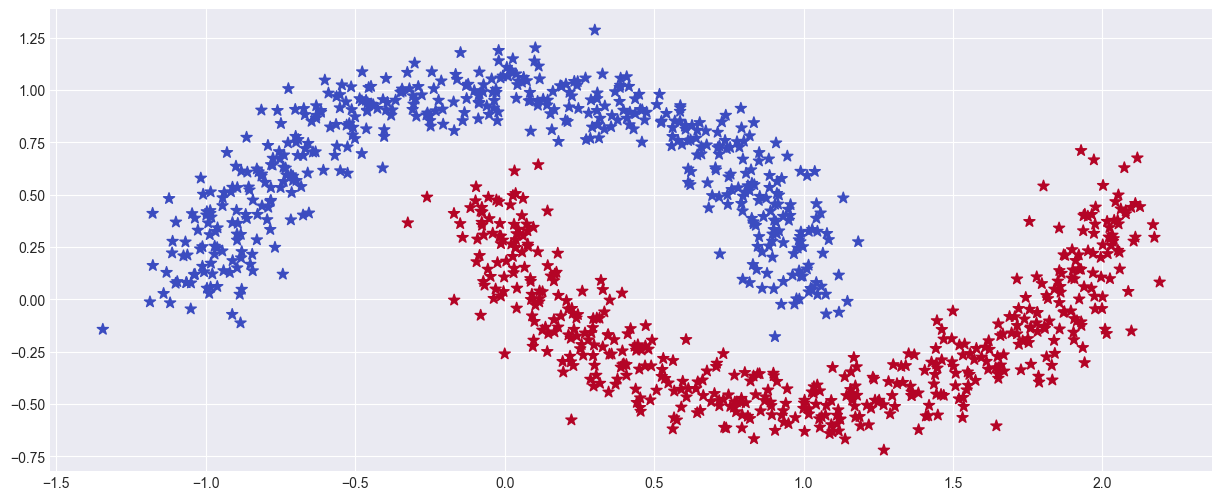

In [37]:
plt.scatter(X[:,0], X[:, 1], s=70, c=y, marker='*', cmap=CMAP)